In [8]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

In [9]:
ss = cv2.imread("./images/screen/yes-dino-1.png", flags=cv2.IMREAD_GRAYSCALE)
dino = cv2.imread("./images/dino/start.png", flags=cv2.IMREAD_GRAYSCALE)

w, h = dino.shape

res = cv2.matchTemplate(ss, dino, cv2.TM_CCOEFF_NORMED)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(res)
(startX, startY) = maxLoc

endX = startX + dino.shape[1]
endY = startY + dino.shape[0]

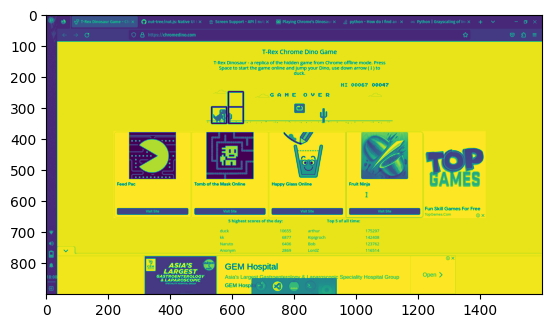

In [10]:
ss = cv2.rectangle(ss, (startX, startY, endX - startX, endY - startY), (0, 0, 0), 3)
ss = cv2.rectangle(ss, (startX + w, startY - h, endX - startX, endY + h - startY), (0, 255, 0), 3)
ss = cv2.rectangle(ss, (startX + w, startY, endX - startX, endY - startY), (0, 0, 255), 3)
plt.imshow(ss);

Average the check area and if gt than thresh, we jump

In [11]:
import glob
images = [cv2.imread(fn, cv2.IMREAD_GRAYSCALE).tolist() for fn in np.random.choice(glob.glob("./images/run/*.png"), 16)]
image_avgs = list(map(np.mean, images))
len(images), len(image_avgs)

(16, 16)

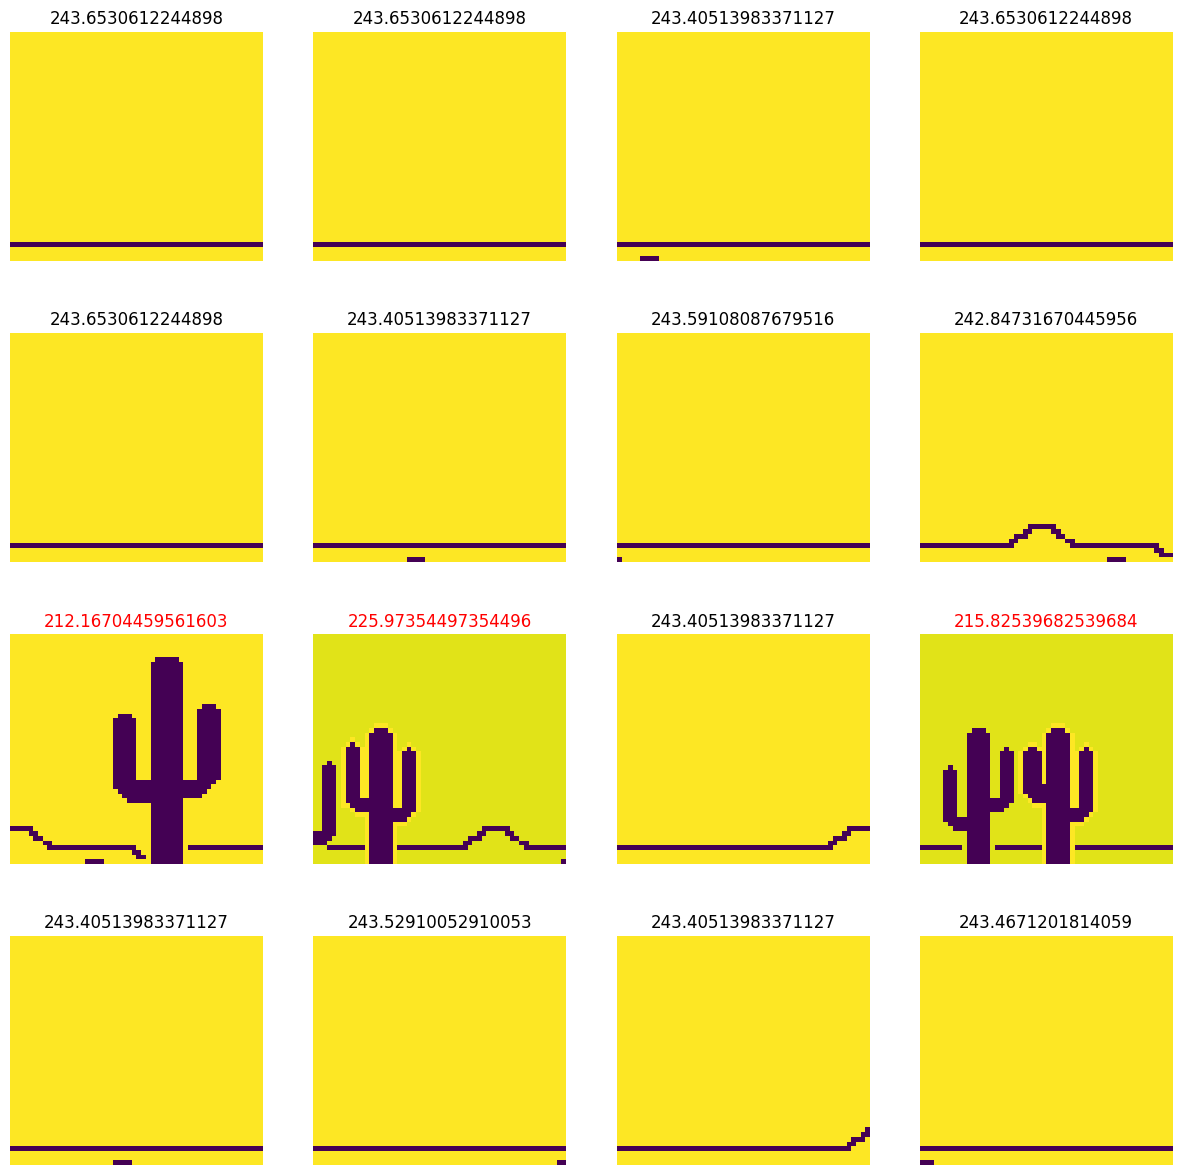

In [12]:
THRESHOLD = 240
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(15, 15))
for i in range(16):
    axes[i // 4][i % 4].imshow(np.array(images[i]))
    axes[i // 4][i % 4].set_title(image_avgs[i], color='red' if image_avgs[i] < THRESHOLD else 'black')
    axes[i // 4][i % 4].axis('off')

In [196]:

del images